In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


LOAD DATA

In [24]:
user_cert_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/user_certification.csv')
certifications_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/certifications.csv')
user_certification = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/user_certification.csv')
user_skill_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/user_skill.csv')
role_skill_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/role_skill.csv')
certifications_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/certifications.csv')

In [25]:
user_cert_df.columns,"user_certification"

(Index(['Unnamed: 0.1', '_id_x', 'userId_x', 'certificationId',
        'certificationName', 'started_at', 'completed_at', 'competency',
        'isVerified', 'imageData', 'user_name', 'total_duration', 'count',
        'name_x', 'role_id', 'joining_date', 'department', 'mail', 'created_at',
        'updated_at', 'password', 'profileImage', 'role_name', 'Unnamed: 0',
        '_id', 'name_y', 'issued_by', 'is_certificate', 'role', 'user_count'],
       dtype='object'),
 'user_certification')

In [26]:
certifications_df.columns,"certifications"

(Index(['_id', 'name', 'issued_by', 'is_certificate', 'role'], dtype='object'),
 'certifications')

In [27]:
user_skill_df.columns,"user_skill"

(Index(['Unnamed: 0.1', '_id_x', 'userId_x', 'skillId', 'score', 'user_name',
        'skill_name', 'total_duration', 'count', 'name_x', 'role_id',
        'joining_date', 'department', 'mail', 'created_at_x', 'updated_at_x',
        'password', 'profileImage', 'role_name', 'Unnamed: 0', '_id', 'desc',
        'user_count'],
       dtype='object'),
 'user_skill')

In [28]:
role_skill_df.columns,"role_skill"

(Index(['Unnamed: 0', 'roleId_x', 'skillId', 'name_x', 'role_name',
        'skill_name', '_id_x', 'name_y', 'desc_x', 'created_at_x',
        'updated_at_x', 'roleId_y', 'skill_count', '_id_y', 'name',
        'created_at_y', 'updated_at_y', 'desc_y', 'user_count'],
       dtype='object'),
 'role_skill')

EDA

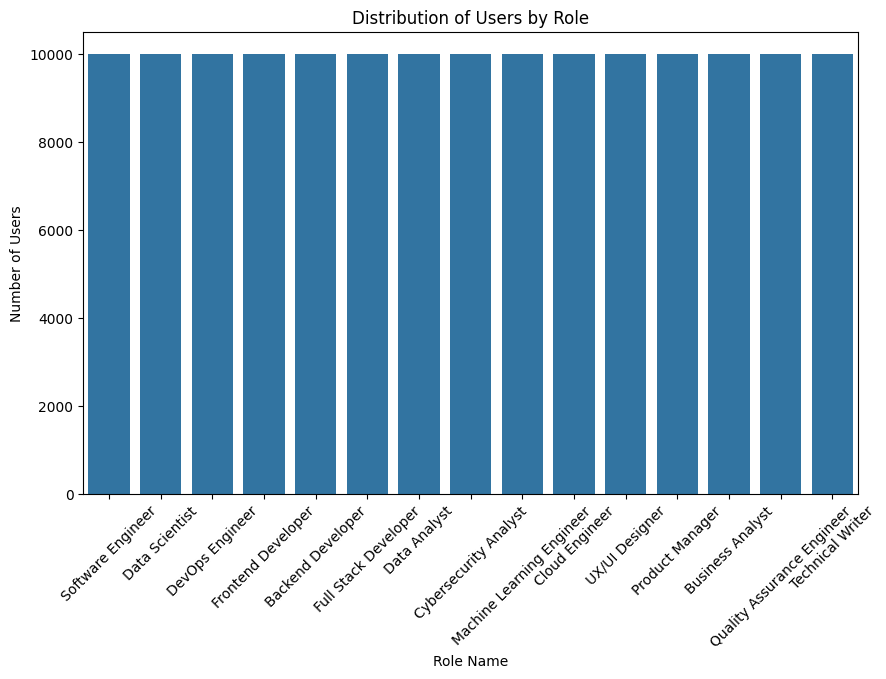

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(data=user_cert_df, x='role_name', order=user_cert_df['role_name'].value_counts().index)
plt.title('Distribution of Users by Role')
plt.xticks(rotation=45)
plt.xlabel('Role Name')
plt.ylabel('Number of Users')
plt.show()


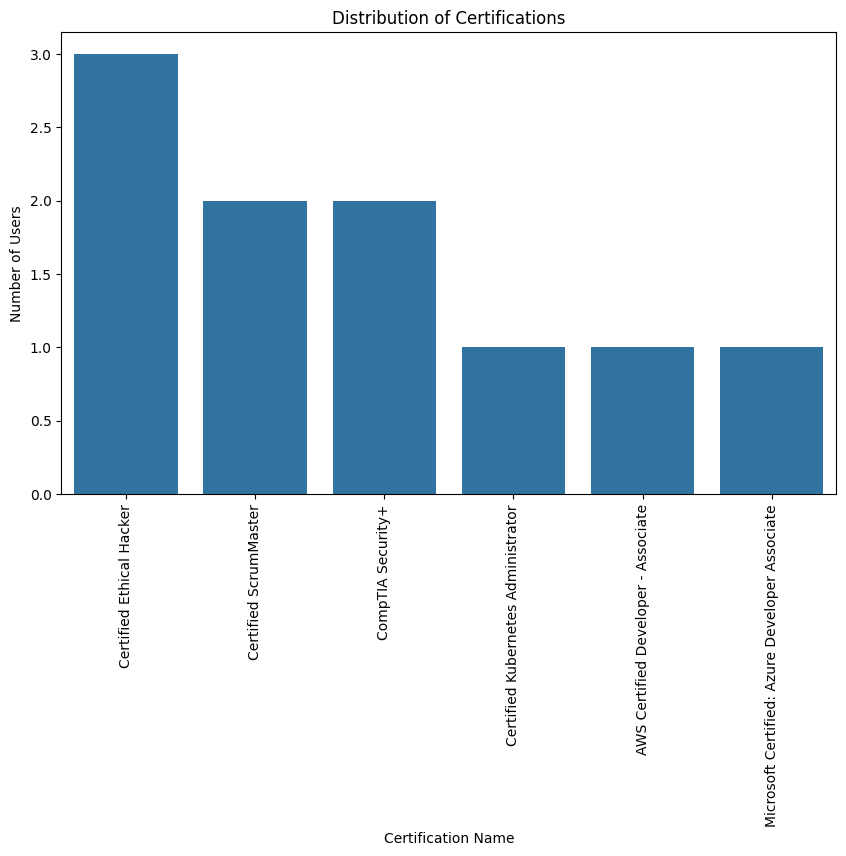

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=user_cert_df[:10], x='certificationName', order=user_cert_df['certificationName'][:10].value_counts().index)
plt.title('Distribution of Certifications')
plt.xticks(rotation=90)
plt.xlabel('Certification Name')
plt.ylabel('Number of Users')
plt.show()

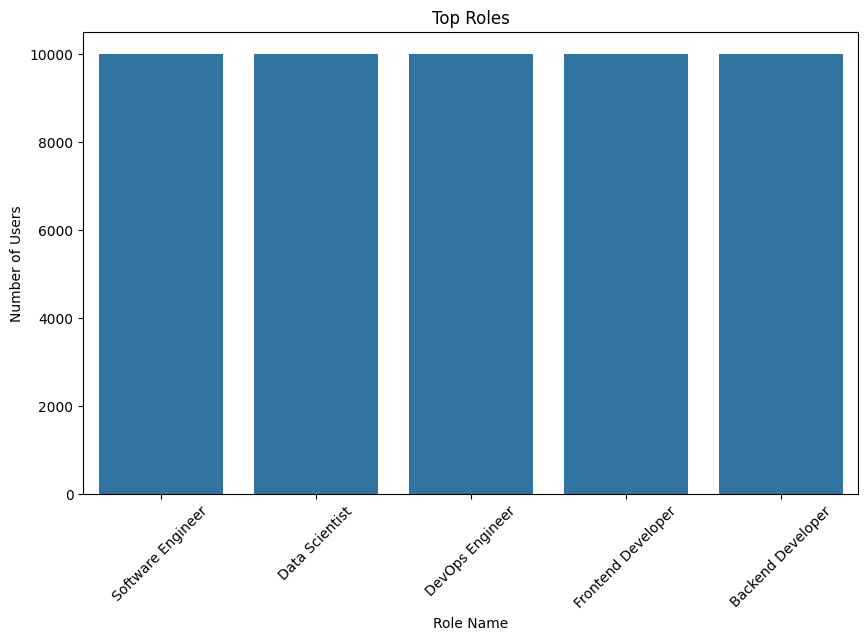

In [31]:
top_roles = user_cert_df['role_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_roles.index, y=top_roles.values)
plt.title('Top Roles')
plt.xticks(rotation=45)
plt.xlabel('Role Name')
plt.ylabel('Number of Users')
plt.show()

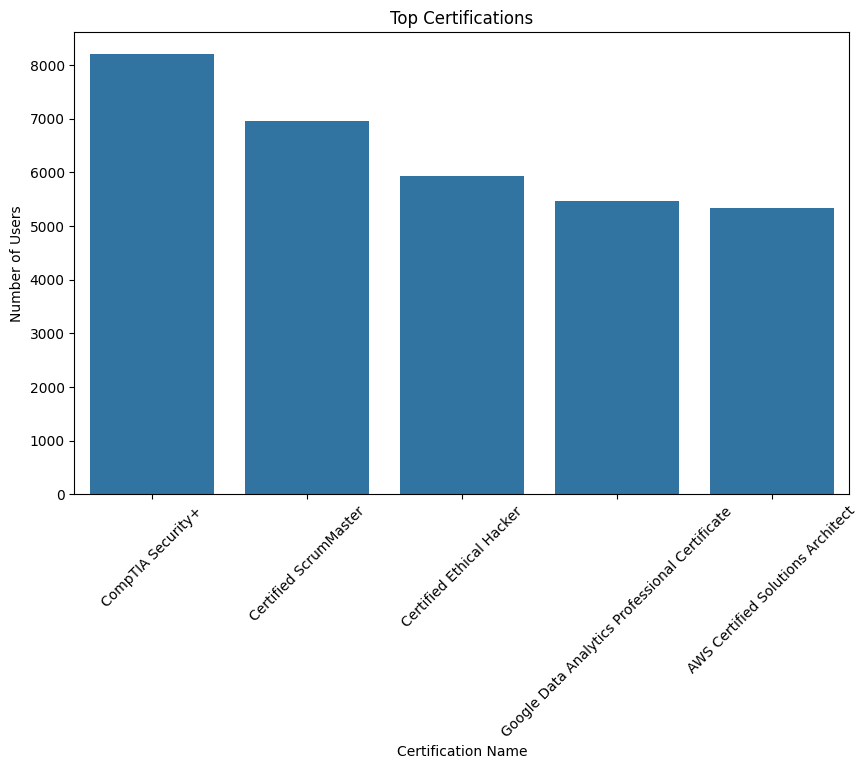

In [32]:
top_certs = user_cert_df['certificationName'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_certs.index, y=top_certs.values)
plt.title('Top Certifications')
plt.xticks(rotation=45)
plt.xlabel('Certification Name')
plt.ylabel('Number of Users')
plt.show()

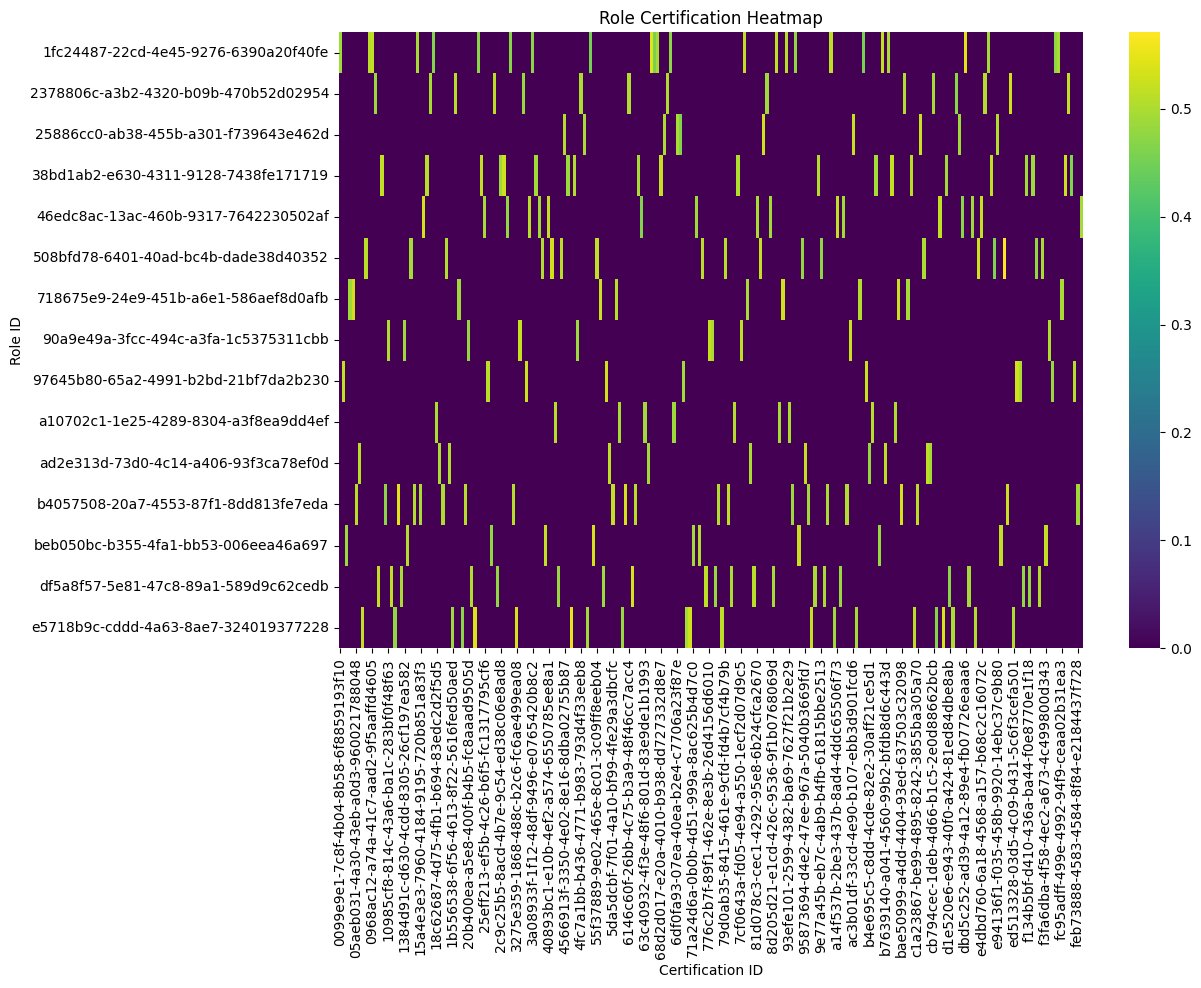

In [33]:


# Create a pivot table with roleId as the index and certificationId as the columns
role_cert_matrix = user_cert_df.pivot_table(index='role_id', columns='certificationId', values='isVerified').fillna(0)

# Visualize the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(role_cert_matrix, cmap='viridis', cbar=True)
plt.title('Role Certification Heatmap')
plt.xlabel('Certification ID')
plt.ylabel('Role ID')
plt.show()

In [34]:
unique_certifications = user_cert_df['certificationId'].nunique()
unique_roles = user_cert_df['role_id'].nunique()
print(f"\nUnique Certifications: {unique_certifications}")
print(f"Unique Roles: {unique_roles}")


Unique Certifications: 232
Unique Roles: 15


In [35]:
user_id = '579c6abd-99d0-4012-bc58-ee780164255d'  #softwareEngineer
user_id = '9448612f-8305-46e7-8306-a1e185013991'  #Backend Dev
user_id = 'c1705e9d-9950-4604-94f6-ef96177b33cc'  #ML
user_id = '9ef4d8b9-a6e5-4cef-a42f-0aa1f7d821e1'  #Product manager
user_id = '52a4889a-757d-47ed-a4ae-f31a020e35b1'  #Data Scientist

Content based

In [37]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
user_certifications = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/user_certification.csv')
certifications_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/certifications.csv')
def recommend_certifications( num_recommendations=5):
    # Load datasets
    user_certification = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/user_certification.csv')
    certifications_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/certifications.csv')

    # Merge user certifications with certification details
    merged_df = user_certification.merge(certifications_df, left_on='certificationId', right_on='_id', suffixes=('_user', '_cert'))

    # Filter certifications for the specified user
    user_certifications = merged_df[merged_df['userId_x'] == user_id].drop_duplicates(subset='certificationId').copy()

    # If the user has no certifications, return an empty result
    if user_certifications.empty:
        return "No certifications found for this user."

    # Get the unique roles from the user's completed certifications
    user_roles = user_certifications['role_name'].unique()

    # Filter all certifications based on the user's roles and keep only unique ones
    relevant_certifications = merged_df[merged_df['role_name'].isin(user_roles)].drop_duplicates(subset='certificationId').copy()

    # If no relevant certifications are found, return a message
    if relevant_certifications.empty:
        return "No relevant certifications found for the user's roles."

    # Create a combined feature for TF-IDF
    relevant_certifications['combined'] = relevant_certifications['certificationName'] + ' ' + relevant_certifications['role_name']
    user_certifications['combined'] = user_certifications['certificationName'] + ' ' + user_certifications['role_name']

    # Create a TF-IDF Vectorizer to convert the combined features into a TF-IDF matrix
    tfidf = TfidfVectorizer(stop_words='english')

    # Fit and transform on both relevant certifications and user certifications
    combined_matrix = tfidf.fit_transform(relevant_certifications['combined'].tolist() + user_certifications['combined'].tolist())

    # Split the combined matrix back into relevant and user parts
    tfidf_matrix_relevant = combined_matrix[:len(relevant_certifications)]
    tfidf_matrix_user = combined_matrix[len(relevant_certifications):]

    # Calculate cosine similarity between the TF-IDF vectors
    cosine_sim = cosine_similarity(tfidf_matrix_relevant, tfidf_matrix_user)

    # Get indices of the relevant certifications
    relevant_indices = relevant_certifications.index.tolist()

    # Initialize an empty list for similarity scores
    all_sim_scores = []

    # Collect similarity scores for all relevant certifications based on roles
    for idx in range(len(relevant_indices)):
        sim_scores = list(enumerate(cosine_sim[idx]))
        all_sim_scores.extend(sim_scores)

    # Sort the certifications based on the similarity scores
    all_sim_scores = sorted(all_sim_scores, key=lambda x: x[1], reverse=True)

    # Filter out the user's own certifications from the recommendations
    user_cert_indices = user_certifications['certificationId'].tolist()
    all_sim_scores = [(i, score) for i, score in all_sim_scores if relevant_certifications.iloc[i]['certificationId'] not in user_cert_indices]

    # Get the scores of the most similar certifications
    all_sim_scores = all_sim_scores[:num_recommendations]  # Limit to desired number of recommendations

    # Get the certification indices
    cert_indices = [i[0] for i in all_sim_scores]

    # Ensure that we have enough recommendations
    if cert_indices:
        recommended_certifications = relevant_certifications.iloc[cert_indices]
        return recommended_certifications[['certificationName', 'role_name']]

    return "Not enough certifications to provide recommendations."


recommended_certs = recommend_certifications()
print("Recommended Certifications:\n", recommended_certs)


Recommended Certifications:
                                        certificationName       role_name
10001         AWS Certified Machine Learning - Specialty  Data Scientist
10000  Microsoft Certified: Azure Data Scientist Asso...  Data Scientist
10003                   Certified Analytics Professional  Data Scientist
10002                       IBM Certified Data Scientist  Data Scientist
10000  Microsoft Certified: Azure Data Scientist Asso...  Data Scientist


Collaborative based

In [42]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import numpy as np

def recommend_certifications(user_id, user_certifications, certifications_df, num_recommendations=5):
    # Drop duplicates in user certifications to ensure unique entries
    user_certifications = user_certifications.drop_duplicates(subset=['userId_x', 'certificationId'])

    # Create a pivot table for user certifications
    pivot_table = user_certifications.pivot(index='userId_x', columns='certificationId', values='isVerified').fillna(0)

    # Apply SVD
    svd = TruncatedSVD(n_components=10)
    latent_matrix = svd.fit_transform(pivot_table)

    # Create a DataFrame for the latent matrix
    latent_df = pd.DataFrame(latent_matrix, index=pivot_table.index)

    # Calculate the predicted ratings
    predicted_ratings = np.dot(latent_df, svd.components_)

    # Create a DataFrame for predicted ratings
    predicted_df = pd.DataFrame(predicted_ratings, index=pivot_table.index, columns=pivot_table.columns)

    # Get the user's predicted scores for all certifications
    user_predicted_scores = predicted_df.loc[user_id]

    # Get the user's already completed certifications
    completed_certifications = user_certifications[user_certifications['userId_x'] == user_id]['certificationId'].unique()

    # Filter out the completed certifications
    recommendations = user_predicted_scores[~user_predicted_scores.index.isin(completed_certifications)]

    # Get top N recommendations
    top_recommendations = recommendations.nlargest(num_recommendations)

    # Merge with certification details
    recommended_certifications = certifications_df[certifications_df['_id'].isin(top_recommendations.index)]
    recommended_certifications['predicted_score'] = top_recommendations.values

    return recommended_certifications[['name', 'predicted_score','issued_by','is_certificate']]

user_certifications = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/user_certification.csv')
certifications_df = pd.read_csv('/content/drive/MyDrive/Jman_fp_DS/certifications.csv')

recommended_certs = recommend_certifications(user_id, user_certifications, certifications_df)
print("Recommended Certifications:\n", recommended_certs)

Recommended Certifications:
                                         name  predicted_score  \
16                  Certified Ethical Hacker         0.330209   
17  Certified Business Analysis Professional         0.315673   
18             CompTIA Cybersecurity Analyst         0.307899   
19       AWS Certified Developer - Associate         0.284732   

                        issued_by  is_certificate  
16  Gallagher, Brown and Johnston            True  
17                Mcdaniel-Carter            True  
18                      Bowen PLC            True  
19    Anderson, Barnes and Flores            True  


<ipython-input-42-fcb0af5078c3>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended_certifications['predicted_score'] = top_recommendations.values


KNN

'Number of unique roles: 15'

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Top 5 Recommendations for Gabriella Evans (Role: Data Scientist):

- CompTIA Cybersecurity Analyst
- AWS Certified Machine Learning - Specialty
- EC-Council Certified Security Analyst (ECSA)
- Statistics for Data Science Certification
- Databricks Certified Associate Developer for Apache Spark


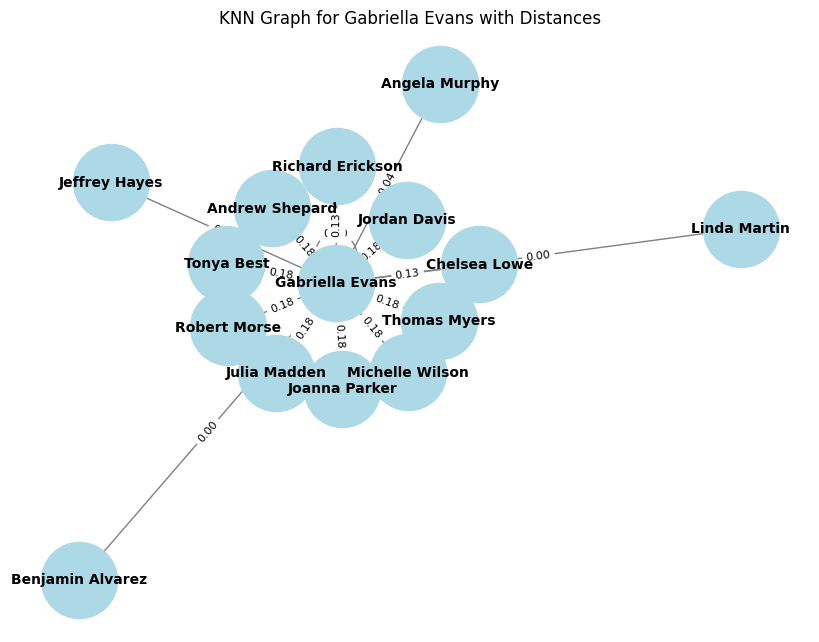

In [31]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from IPython.display import display
import networkx as nx

# Load the user_certification DataFrame (assuming it has role information)


# Pivot the data to create a user-certification matrix
user_cert_matrix = user_cert_df.pivot_table(index='userId_x', columns='certificationId', values='isVerified').fillna(0)
# print(pd.DataFrame(user_cert_matrix))
# Create a DataFrame to map user IDs to names, roles, and certification IDs to names
user_info = user_cert_df[['userId_x', 'user_name', 'role_id', 'role_name']].drop_duplicates().set_index('userId_x')
cert_names = user_cert_df[['certificationId', 'certificationName']].drop_duplicates().set_index('certificationId')

# Calculate the number of unique roles
unique_roles = user_cert_df['role_id'].nunique()  # or 'role_name' if you want to use role names
display(f"Number of unique roles: {unique_roles}")

# Build the KNN model with neighbors based on the unique roles
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=unique_roles)
knn_model.fit(user_cert_matrix)
# cluster_labels = knn_model.labels_
# cluster_centers = knn_model.cluster_centers_

# Function to recommend top 5 certifications using KNN with neighbor count based on roles
def recommend_knn_by_role(user_id):
    # Ensure that the user exists
    if user_id not in user_cert_matrix.index:
        return f"User ID {user_id} not found in the dataset."

    # Get the index of the user in the matrix
    user_idx = user_cert_matrix.index.get_loc(user_id)

    # Find nearest neighbors (based on unique role count)
    distances, indices = knn_model.kneighbors([user_cert_matrix.iloc[user_idx]], n_neighbors=unique_roles + 1)

    # Ignore the first neighbor, as it will be the user itself
    similar_users = user_cert_matrix.index[indices.flatten()[1:]]

    # Aggregate certifications from similar users and recommend
    similar_users_certifications = user_cert_matrix.loc[similar_users].sum().sort_values(ascending=False)
    user_certifications = user_cert_matrix.loc[user_id]

    # Filter out certifications that the user already has
    recommended_certs = similar_users_certifications[user_certifications == 0].head(5)  # Get top 5

    # Create a DataFrame for the recommended certifications with user names
    recommended_cert_names = pd.DataFrame(recommended_certs).reset_index()
    recommended_cert_names.columns = ['certificationId', 'count']
    recommended_cert_names = recommended_cert_names.merge(cert_names, on='certificationId')

    # Get user info for the requesting user
    user_name = user_info.loc[user_id, 'user_name']
    user_role = user_info.loc[user_id, 'role_name']  # Get the user's role name

    # Displaying the user name and role along with recommended certifications
    print(f"Top 5 Recommendations for {user_name} (Role: {user_role}):\n")

    for _, row in recommended_cert_names.iterrows():
        print(f"- {row['certificationName']}")

    # return recommended_cert_names
def recommend_knn_by_role_with_graph(user_id):
    # Ensure that the user exists
    if user_id not in user_cert_matrix.index:
        return f"User ID {user_id} not found in the dataset."

    # Get the index of the user in the matrix
    user_idx = user_cert_matrix.index.get_loc(user_id)

    # Find nearest neighbors (based on unique role count)
    distances, indices = knn_model.kneighbors([user_cert_matrix.iloc[user_idx]], n_neighbors=unique_roles + 1)

    # Ignore the first neighbor, as it will be the user itself
    similar_users = user_cert_matrix.index[indices.flatten()[1:]]
    similar_distances = distances.flatten()[1:]  # Corresponding distances

    # Create a graph
    G = nx.Graph()

    # Add the target user as a node
    target_user_name = user_info.loc[user_id, 'user_name']
    G.add_node(target_user_name, label='Target User')

    # Add similar users to the graph with distances as edge labels
    for idx, distance in zip(indices.flatten()[1:], similar_distances):
        similar_user_name = user_info.loc[user_cert_matrix.index[idx], 'user_name']
        G.add_node(similar_user_name, label='Similar User')
        G.add_edge(target_user_name, similar_user_name, weight=distance)  # Connect the user to neighbors with distance

    # Plot the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=3000, font_color='black', font_weight='bold', edge_color='gray')

    # Draw edge labels to show the distances
    edge_labels = {(target_user_name, user_info.loc[user_cert_matrix.index[idx], 'user_name']): f"{dist:.2f}" for idx, dist in zip(indices.flatten()[1:], similar_distances)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f"KNN Graph for {target_user_name} with Distances")
    plt.show()

# Example call to the function
recommend_knn_by_role(user_id)
recommend_knn_by_role_with_graph(user_id)


'Number of unique roles: 15'

Top 5 Recommendations for Gabriella Evans (Role: Data Scientist):

- Certified Information Systems Security Professional
- Certified Technical Writer (CTW)
- Certified Cloud Security Professional
- Statistics for Data Science Certification
- Databricks Certified Associate Developer for Apache Spark


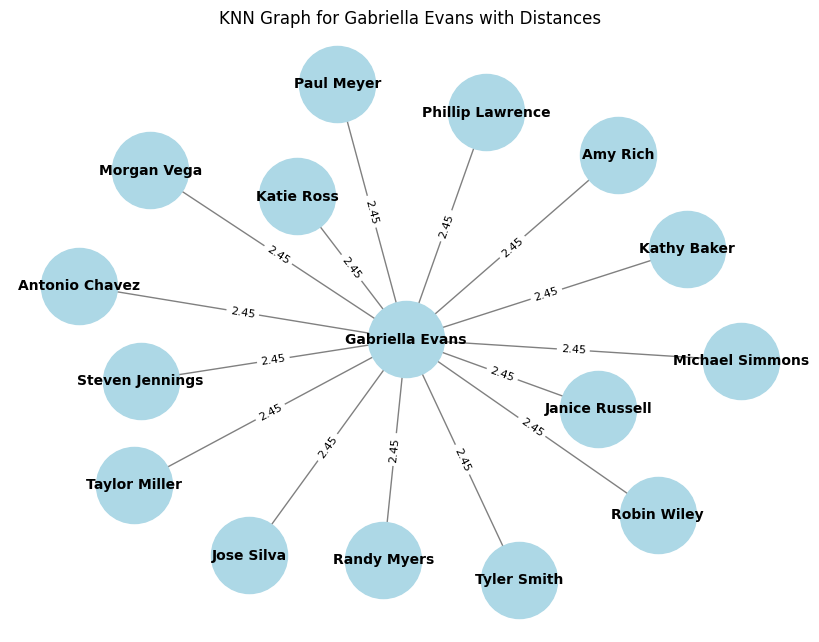

In [35]:
from sklearn.neighbors import NearestNeighbors
import pandas as pd
from IPython.display import display
import networkx as nx
from sklearn.preprocessing import StandardScaler

# Load the user_certification DataFrame (assuming it has role information)


# Pivot the data to create a user-certification matrix
user_cert_matrix = user_cert_df.pivot_table(index='userId_x', columns='certificationId', values='isVerified').fillna(0)
# print(pd.DataFrame(user_cert_matrix))
# Create a DataFrame to map user IDs to names, roles, and certification IDs to names
user_info = user_cert_df[['userId_x', 'user_name', 'role_id', 'role_name']].drop_duplicates().set_index('userId_x')
cert_names = user_cert_df[['certificationId', 'certificationName']].drop_duplicates().set_index('certificationId')

# Calculate the number of unique roles
unique_roles = user_cert_df['role_id'].nunique()  # or 'role_name' if you want to use role names
display(f"Number of unique roles: {unique_roles}")

scaler = StandardScaler()
user_cert_matrix_scaled = scaler.fit_transform(user_cert_matrix)

# Build the KNN model with neighbors based on the unique roles
# euclidean
knn_model = NearestNeighbors(metric='euclidean', algorithm='brute', n_neighbors=unique_roles)
knn_model.fit(user_cert_matrix_scaled)
# cluster_labels = knn_model.labels_
# cluster_centers = knn_model.cluster_centers_

# Function to recommend top 5 certifications using KNN with neighbor count based on roles
def recommend_knn_by_role(user_id):
    # Ensure that the user exists
    if user_id not in user_cert_matrix.index:
        return f"User ID {user_id} not found in the dataset."

    # Get the index of the user in the matrix
    user_idx = user_cert_matrix.index.get_loc(user_id)

    # Find nearest neighbors (based on unique role count)
    distances, indices = knn_model.kneighbors([user_cert_matrix.iloc[user_idx]], n_neighbors=unique_roles + 1)

    # Ignore the first neighbor, as it will be the user itself
    similar_users = user_cert_matrix.index[indices.flatten()[1:]]

    # Aggregate certifications from similar users and recommend
    similar_users_certifications = user_cert_matrix.loc[similar_users].sum().sort_values(ascending=False)
    user_certifications = user_cert_matrix.loc[user_id]

    # Filter out certifications that the user already has
    recommended_certs = similar_users_certifications[user_certifications == 0].head(5)  # Get top 5

    # Create a DataFrame for the recommended certifications with user names
    recommended_cert_names = pd.DataFrame(recommended_certs).reset_index()
    recommended_cert_names.columns = ['certificationId', 'count']
    recommended_cert_names = recommended_cert_names.merge(cert_names, on='certificationId')

    # Get user info for the requesting user
    user_name = user_info.loc[user_id, 'user_name']
    user_role = user_info.loc[user_id, 'role_name']  # Get the user's role name

    # Displaying the user name and role along with recommended certifications
    print(f"Top 5 Recommendations for {user_name} (Role: {user_role}):\n")

    for _, row in recommended_cert_names.iterrows():
        print(f"- {row['certificationName']}")

    # return recommended_cert_names
def recommend_knn_by_role_with_graph(user_id):
    # Ensure that the user exists
    if user_id not in user_cert_matrix.index:
        return f"User ID {user_id} not found in the dataset."

    # Get the index of the user in the matrix
    user_idx = user_cert_matrix.index.get_loc(user_id)

    # Find nearest neighbors (based on unique role count)
    distances, indices = knn_model.kneighbors([user_cert_matrix.iloc[user_idx]], n_neighbors=unique_roles + 1)

    # Ignore the first neighbor, as it will be the user itself
    similar_users = user_cert_matrix.index[indices.flatten()[1:]]
    similar_distances = distances.flatten()[1:]  # Corresponding distances

    # Create a graph
    G = nx.Graph()

    # Add the target user as a node
    target_user_name = user_info.loc[user_id, 'user_name']
    G.add_node(target_user_name, label='Target User')

    # Add similar users to the graph with distances as edge labels
    for idx, distance in zip(indices.flatten()[1:], similar_distances):
        similar_user_name = user_info.loc[user_cert_matrix.index[idx], 'user_name']
        G.add_node(similar_user_name, label='Similar User')
        G.add_edge(target_user_name, similar_user_name, weight=distance)  # Connect the user to neighbors with distance

    # Plot the graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes
    nx.draw(G, pos, with_labels=True, node_color='lightblue', font_size=10, node_size=3000, font_color='black', font_weight='bold', edge_color='gray')

    # Draw edge labels to show the distances
    edge_labels = {(target_user_name, user_info.loc[user_cert_matrix.index[idx], 'user_name']): f"{dist:.2f}" for idx, dist in zip(indices.flatten()[1:], similar_distances)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

    plt.title(f"KNN Graph for {target_user_name} with Distances")
    plt.show()

# Example call to the function
recommend_knn_by_role(user_id)
recommend_knn_by_role_with_graph(user_id)
